In [4]:
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
rb_ratings = pd.read_csv('ratings.csv')
rb_ratings.date = pd.to_datetime(rb_ratings.date, unit='s')
rb_ratings.head()

,beer_name,beer_id,brewery_name,brewery_id,style,abv,date,user_name,user_id,appearance,aroma,palate,taste,overall,rating,text
0,33 Export (Gabon),410549,Sobraga,3198,Pale Lager,5.0,2016-04-26 10:00:00,Manslow,175852,2,4,2,4,8,2.0,"Puszka 0,33l dzięki Christoph . Kolor jasnozło..."
1,Castel Beer (Gabon),105273,Sobraga,3198,Pale Lager,5.2,2017-02-17 11:00:00,MAGICuenca91,442761,2,3,2,4,8,1.9,Cerveza pale lager gabonesa. MÃ¡s floja que la...
2,Castel Beer (Gabon),105273,Sobraga,3198,Pale Lager,5.2,2016-06-24 10:00:00,Sibarh,288889,3,3,2,3,5,1.6,"Kolor- złoty, klarowny. Piana - drobna, średni..."
3,Castel Beer (Gabon),105273,Sobraga,3198,Pale Lager,5.2,2016-01-01 11:00:00,fombe89,250510,4,3,1,2,5,1.5,"Botella, de GabÃ³n regalo familiar.31/01/2015C..."
4,Castel Beer (Gabon),105273,Sobraga,3198,Pale Lager,5.2,2015-10-23 10:00:00,kevnic2008,122778,2,4,2,4,7,1.9,Many thanks for this beer to Erzengel. Pours l...


In [6]:
# Keep only the ratings between 2010 and 2012
rb_ratings = rb_ratings[rb_ratings.date.dt.year.isin([2010, 2011, 2012])]

In [90]:
rb_users = pd.read_csv('users.csv')
rb_users.joined = pd.to_datetime(rb_users.joined, unit='s')
rb_users.head()


,nbr_ratings,user_id,user_name,joined,location
0,1890,175852,Manslow,2012-05-20 10:00:00,Poland
1,89,442761,MAGICuenca91,2017-01-10 11:00:00,Spain
2,169,288889,Sibarh,2013-11-16 11:00:00,Poland
3,3371,250510,fombe89,2013-03-22 11:00:00,Spain
4,13043,122778,kevnic2008,2011-02-02 11:00:00,Germany


In [8]:
# Remove users without a location
rb_users = rb_users[rb_users.location.notnull()]

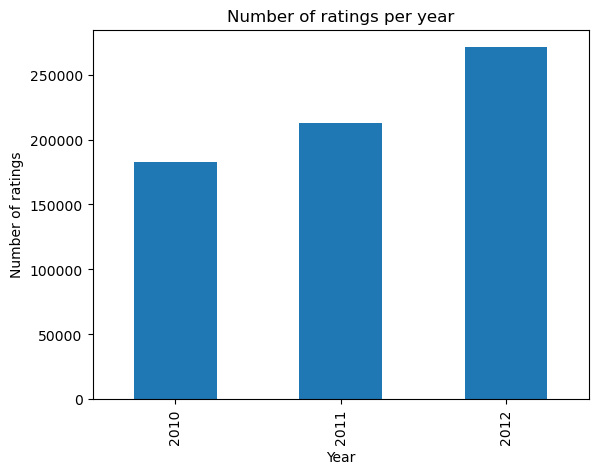

In [9]:
# Plot the distribution of the ratings per year
rb_ratings.date.dt.year.value_counts().sort_index().plot(kind='bar')
plt.title('Number of ratings per year')
plt.xlabel('Year')
plt.ylabel('Number of ratings')
plt.show()

In [99]:
# Join ratings and users on user_id to count the number of ratings per location
rb_ratings_per_location = rb_ratings.merge(rb_users[['user_id', 'location']], on='user_id')
rb_ratings_per_location = rb_ratings_per_location.groupby('location').count()

# Create a new column with the number of ratings per location
rb_ratings_per_location['count'] = rb_ratings_per_location['user_id']
rb_ratings_per_location = rb_ratings_per_location[['count']]

# Sort by the number of ratings
rb_ratings_per_location = rb_ratings_per_location.sort_values(by='count', ascending=False)
rb_ratings_per_location.head()


# Converting from series object to dataframe
# Making a dictionary of frequencies
country_frequencies = {}
for country,count in rb_ratings_per_location.iterrows(): 
    count_parts = count.tolist()
    country_frequencies[country] = count_parts[0]

# Converting to values
dict_to_dataframe = {'location': list(country_frequencies.keys()), 'locations amount': list(country_frequencies.values())}
rb_ratings_per_location = pd.DataFrame.from_dict(dict_to_dataframe)
rb_ratings_per_location

   


,location,locations amount
0,Denmark,101276
1,Canada,69144
2,"United States, California",39572
3,Sweden,33766
4,Norway,33740
...,...,...
158,Montenegro,1
159,Cuba,1
160,Cayman Islands,1
161,Namibia,1


In [122]:
# Reading in breweries so that we only take from breweries that are in the top 10% to avoid noise

rb_breweries = pd.read_csv("breweries.csv")
rb_ratings_for_brewery = rb_ratings.merge(rb_breweries[['id', 'name']], left_on='brewery_id', right_on='id')
rb_ratings_for_brewery
rb_ratings_for_brewery = rb_ratings_for_brewery.groupby('brewery_name').count()

# Create a new column with the number of ratings per location
rb_ratings_for_brewery['count'] = rb_ratings_for_brewery['brewery_id']
rb_ratings_for_brewery = rb_ratings_for_brewery[['count']]

# Sort by the number of ratings
rb_ratings_for_brewery = rb_ratings_for_brewery.sort_values(by='count', ascending=False)
rb_ratings_for_brewery

brewery_frequencies = {}
for brewery,count in rb_ratings_for_brewery.iterrows(): 
    count_parts = count.tolist()
    brewery_frequencies[brewery] = count_parts[0]

dict_to_dataframe = {'brewery_name': list(brewery_frequencies.keys()), 'brewery_count': list(brewery_frequencies.values())}
rb_ratings_for_brewery = pd.DataFrame.from_dict(dict_to_dataframe)
rb_ratings_for_brewery



,brewery_name,brewery_count
0,Port Brewing Company / The Lost Abbey,12440
1,Lagunitas Brewing Company &#40;Heineken&#41;,9834
2,Nøgne Ø (Hansa Borg),8789
3,New Glarus Brewing Company,7090
4,Russian River Brewing,6216
...,...,...
5391,Strömsfors Bryggeri,1
5392,König-Sahl,1
5393,Browar Wielkopolski w Krotoszynie,1
5394,LM Brewery,1


In [128]:
# Filtering ratings so that users only come from countries with a certain number of ratings
# Also filtering ratings so that users above the 90th percentile ratings are not included because they could be a bit of an outlier




MIN_THRESHOLD_FOR_LOCATION = 10000 # We only want to keep ratings where the users are in countries above this min threshold
MAX_THRESHOLD_FOR_USER_RATINGS  = rb_users['nbr_ratings'].quantile(0.9) # Do not include users who have an excessive amount of ratings because they could reduce noise
MIN_THRESHOLD_FOR_BREWERIES = rb_ratings_for_brewery['brewery_count'].quantile(0.25) # Only consider ratings for breweries which are in the 75% of popularity






filtered_rb_ratings = rb_ratings.copy() # Copying existing dataframe

#



users_copy = rb_users.copy()
users_with_location_amount = pd.merge(users_copy, rb_ratings_per_location, on='location', how='left') 
ratings_with_user_stats = pd.merge(users_with_location_amount, rb_ratings, on = 'user_id', how = 'right') 
ratings_with_user_stats = pd.merge(ratings_with_user_stats, rb_ratings_for_brewery, on = 'brewery_name')

#Filtering statement
ratings_with_user_stats = ratings_with_user_stats[(ratings_with_user_stats['locations amount'] > MIN_THRESHOLD_FOR_LOCATION) & (ratings_with_user_stats['nbr_ratings'] < MAX_THRESHOLD_FOR_USER_RATINGS) & (ratings_with_user_stats['brewery_count'] > MIN_THRESHOLD_FOR_BREWERIES)]
ratings_with_user_stats



,nbr_ratings,user_id,user_name_x,joined,location,locations amount,beer_name,beer_id,brewery_name,brewery_id,...,date,user_name_y,appearance,aroma,palate,taste,overall,rating,text,brewery_count
229,22,124721,andsled,2011-03-05 11:00:00,England,18536.0,Hilden Twisted Hop,155275,Hilden,2099,...,2011-11-18 11:00:00,andsled,4,8,3,8,14,3.7,Wetherspoons middlesbrough. Beer was in top no...,179
246,1,206227,nniF,2012-07-21 10:00:00,Germany,33419.0,Whitewater Belfast Ale,31973,Whitewater,4347,...,2012-07-31 10:00:00,nniF,4,8,5,7,14,3.8,I dont like Guinness caused thats I had drunk ...,152
369,21,162009,Alexgc,2012-03-05 11:00:00,Norway,33740.0,Whitewater Crown & Glory,31974,Whitewater,4347,...,2012-06-10 10:00:00,Alexgc,4,5,2,4,6,2.1,From tap at mchugh's. Not very much here.. Lit...,152
421,1,72188,GonzoIllini,2008-03-25 11:00:00,"United States, Illinois",16178.0,N&R - Shot In The Dark,150375,Neill & Ross,13189,...,2012-06-16 10:00:00,GonzoIllini,4,6,4,8,8,3.0,"Purple / maroon colored, phenolic baby diaper...",39
460,51,109465,MikeyMalts,2010-07-07 10:00:00,"United States, California",39572.0,Strangford Lough Legbiter,37923,Strangford Lough,4959,...,2011-04-12 10:00:00,MikeyMalts,3,5,3,5,12,2.8,12oz btl from distributor rep. Poured in tulip...,137
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
665973,9,99706,Randel,2010-01-05 11:00:00,"United States, California",39572.0,Chang Beer 6.4%,2245,Thai Beverages,391,...,2010-01-06 11:00:00,Randel,3,2,2,3,7,1.7,Aroma was a bit on the skunky side. Pours gold...,461
665976,6,33025,cheaphead,2006-02-02 11:00:00,Canada,69144.0,Chang Beer 6.4%,2245,Thai Beverages,391,...,2012-11-03 11:00:00,cheaphead,3,7,3,6,13,3.2,was in thailand and preferred chang over singh...,461
666006,1,134893,stamfordbus,2011-09-05 10:00:00,England,18536.0,Chang Beer 6.4%,2245,Thai Beverages,391,...,2011-09-05 10:00:00,stamfordbus,4,9,5,9,20,4.7,"Best beer in Thailand for price and taste, sha...",461
666012,2,91707,DrunkTailgater,2009-06-02 10:00:00,"United States, California",39572.0,Chang Beer 6.4%,2245,Thai Beverages,391,...,2011-05-22 10:00:00,DrunkTailgater,3,2,3,3,4,1.5,Just not a very good beer! Was kinda of skunky...,461


In [132]:
!pip install geopy
!pip install folium

from geopy.geocoders import Nominatim
import folium



(52.5310214, -1.2649062)


In [138]:

def geocode_location(location_name):
    geolocator = Nominatim(user_agent="my_geocoder")
    location = geolocator.geocode(location_name)
    if location:
        return location.latitude, location.longitude
    else:
        return None

all_brewery_locations = rb_breweries['location'].tolist()
all_distinct_brewery_locations = list(set(all_brewery_locations))
brewery_latitudes_longitudes = []
for location in all_distinct_brewery_locations:
    res = geocode_location(location)
    if res:
        lat,long = res
        brewery_latitudes_longitudes.append([lat, long])
print(brewery_latitudes_longitudes)



  




[[32.3635964, 35.561242], [13.8000382, -88.9140683], [56.7861112, -4.1140518], [10.2116702, 38.6521203], [-41.5000831, 172.8344077], [-13.2687204, 33.9301963], [42.5869578, 20.9021231], [8.7800265, 1.0199765], [44.3053476, 17.5961467], [41.1927739, -95.4256198], [7.0323598, 19.9981227], [64.4459613, -149.680909], [35.8323648, 38.5414697], [40.0796606, -89.4337288], [45.3658443, 15.6575209], [9.5293472, 2.2584408], [43.7323492, 7.4276832], [-19.9160819, -175.202642], [44.6471761, -100.348761], [43.6447642, -114.015407], [24.0002488, 53.9994829], [-32.8755548, -56.0201525], [53.4250605, 27.6971358], [-6.8699697, -75.0458515], [30.8703881, -92.007126], [64.9841821, -18.1059013], [39.3181528, -79.8109014], [-0.2864982, 36.0514231], [35.8681298, -90.9456751], [38.4758406, -80.8408415], [22.0452303, 96.4514694], [47.3752671, -109.638757], [49.4566233, -2.5822348], [2.9368696, 115.4443356], [12.90447, -61.2765569], [3.9767059, -73.1493675], [36.638392, 127.6961188], [4.5693754, 102.2656823], 

In [142]:
from folium.plugins import HeatMap
from IPython.display import display


map_center = [sum(p[0] for p in brewery_latitudes_longitudes) / len(brewery_latitudes_longitudes), sum(p[1] for p in brewery_latitudes_longitudes) / len(brewery_latitudes_longitudes)]
my_map = folium.Map(location=map_center, zoom_start=4)

# Add the heatmap layer
HeatMap(brewery_latitudes_longitudes).add_to(my_map)

# Save the map to an HTML file
display(my_map)
